# Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

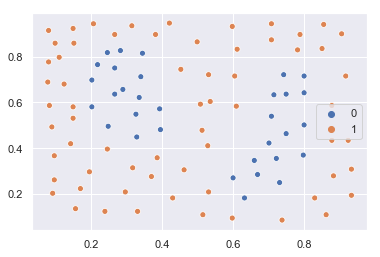

In [43]:
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/svm.csv', header=None)

X = df.iloc[:, 0:2].values
y = df[df.columns[2]].values

ax = sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, test_size=0.30, random_state=101)

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [45]:
model = SVC(kernel='rbf', gamma=25)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

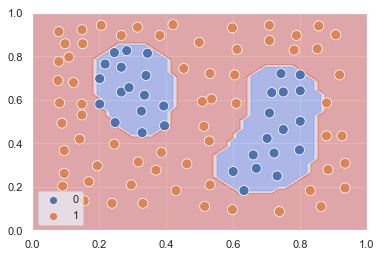

In [46]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [47]:
from sklearn.metrics import precision_recall_fscore_support

[0 1]
0.9655172413793104
(0.9895833333333334, 0.9895833333333334, 0.9895833333333334, None)


In [48]:
print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))
print(accuracy_score(y_test, model.predict(X_test)))
print(precision_recall_fscore_support(y_test, model.predict(X_test), average='micro'))

[0 1]
0.9655172413793104
(0.9655172413793104, 0.9655172413793104, 0.9655172413793104, None)


# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [49]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [0.01, 1, 3, 9, 25, 27], 'kernel': ['rbf']} 

In [50]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [53]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, iid=None, cv=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [54]:
grid.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ..... C=0.1, gamma=0.01, kernel=rbf, score=0.65625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6774193548387096, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........ C=0.1, gamma=1, kernel=rbf, score=0.65625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6774193548387096, total=   0.0s
[CV] C=0.1, gamma=3, kernel=rbf .....................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=None, n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 1, 3, 9, 25, 27], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [55]:
grid.best_params_

{'C': 10, 'gamma': 27, 'kernel': 'rbf'}

In [59]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=27, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
pred = grid.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

